In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("checking.csv")

In [4]:
df=df.drop(['상품군', '상품명', '주문량', '요일', '휴일', 'day', 'season', 
            '월', '화', '수', '목', '금', '토','일','month','working_day'], axis=1)
df[['가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화',
       '주방', '침구', '가을', '겨울', '봄', '여름']] = df[['가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화',
       '주방', '침구', '가을', '겨울', '봄', '여름']] * 1

In [5]:
df

,노출(분),마더코드,상품코드,판매단가,취급액,hour,resting_day,소비자심리지수,가구,가전,...,속옷,의류,이미용,잡화,주방,침구,가을,겨울,봄,여름
0,20.0,100346,201072,39900,3262000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,20.0,100346,201079,39900,6955000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
2,20.0,100346,201072,39900,6672000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
3,20.0,100346,201079,39900,9337000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
4,20.0,100305,200974,59000,6819000,7,True,97.5,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36894,20.0,100448,201391,148000,10157000,23,False,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
36895,20.0,100448,201383,178000,50929000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
36896,20.0,100448,201390,168000,104392000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
36897,20.0,100448,201384,158000,13765000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0


In [6]:
# 취급액이 0인 행 제거
print(len(df[df['취급액']==0]))
null_idx=df[df['취급액']==0].index
df=df.drop(null_idx).reset_index(drop=True)

1978


In [7]:
# 판매단가가 취급액 보다 큰 행 제거
mismatch=df[df['판매단가'] >= df['취급액']].index
df=df.drop(mismatch).reset_index(drop=True)

In [8]:
df

,노출(분),마더코드,상품코드,판매단가,취급액,hour,resting_day,소비자심리지수,가구,가전,...,속옷,의류,이미용,잡화,주방,침구,가을,겨울,봄,여름
0,20.0,100346,201072,39900,3262000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,20.0,100346,201079,39900,6955000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
2,20.0,100346,201072,39900,6672000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
3,20.0,100346,201079,39900,9337000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
4,20.0,100305,200974,59000,6819000,7,True,97.5,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34916,20.0,100448,201391,148000,10157000,23,False,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
34917,20.0,100448,201383,178000,50929000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
34918,20.0,100448,201390,168000,104392000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
34919,20.0,100448,201384,158000,13765000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0


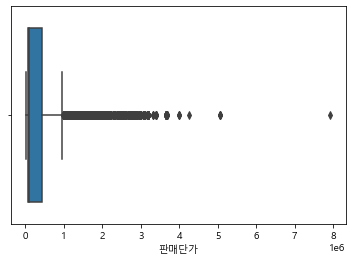

In [9]:
sns.boxplot(df['판매단가'])

In [10]:
# 판매단가 이상치 제거
num1=np.percentile(df['판매단가'], 25)
num2=np.percentile(df['판매단가'], 75)
iqr = (num2-num1)*1.5
lowest=num1-iqr
highest=num2+iqr

outlier_idx= df[(df['판매단가']<lowest)|(df['판매단가']>highest)].index

print(len(outlier_idx)) # 제거하는 행 개수

df=df.drop(outlier_idx).reset_index(drop=True)
df

4988


,노출(분),마더코드,상품코드,판매단가,취급액,hour,resting_day,소비자심리지수,가구,가전,...,속옷,의류,이미용,잡화,주방,침구,가을,겨울,봄,여름
0,20.0,100346,201072,39900,3262000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,20.0,100346,201079,39900,6955000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
2,20.0,100346,201072,39900,6672000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
3,20.0,100346,201079,39900,9337000,6,True,97.5,0,0,...,0,1,0,0,0,0,0,1,0,0
4,20.0,100305,200974,59000,6819000,7,True,97.5,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29928,20.0,100448,201391,148000,10157000,23,False,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
29929,20.0,100448,201383,178000,50929000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
29930,20.0,100448,201390,168000,104392000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0
29931,20.0,100448,201384,158000,13765000,0,True,100.5,0,0,...,0,0,0,0,1,0,0,1,0,0


In [11]:
# sns.boxplot(df['취급액'])

In [12]:
# # 취급액 이상치 제거
# num1=np.percentile(df['취급액'], 25)
# num2=np.percentile(df['취급액'], 75)
# iqr = (num2-num1)*1.5
# lowest=num1-iqr
# highest=num2+iqr

# outlier_idx= df[(df['취급액']<lowest)|(df['취급액']>highest)].index

# print(len(outlier_idx))

# df=df.drop(outlier_idx).reset_index(drop=True)
# df

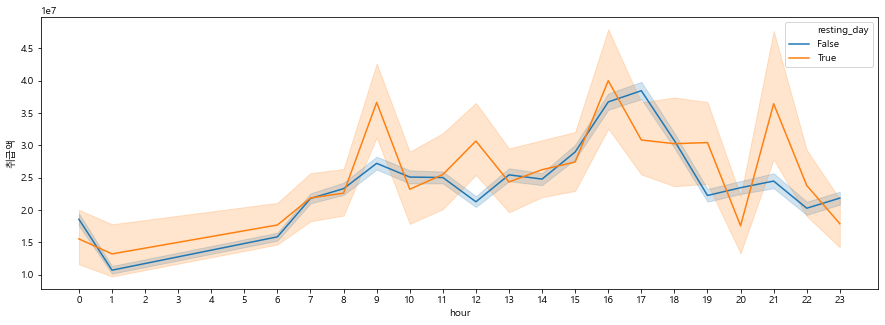

In [13]:
fig=plt.figure(figsize=(15,5))

ax = sns.lineplot(x='hour', y='취급액', data=df, hue='resting_day')
ax.set(xticks=np.arange(0,24))

plt.show()

In [14]:
# prime 시간대:
# 평일: 07:00~11:00, 15:00~18:00
# 주말: 09:00~12:00, 16:00~19:00, 21:00
df['prime'] = 0

for i in list(df.index):
    # 평일
    if df.loc[i, 'resting_day']==False:
        if (df.loc[i, 'hour'] >= 7) & (df.loc[i, 'hour'] <= 11):
            df.loc[i, 'prime'] = 1
        elif (df.loc[i, 'hour'] >= 15) & (df.loc[i, 'hour'] <= 18):
            df.loc[i, 'prime'] = 1
    # 주말
    if df.loc[i, 'resting_day']==True:
        if (df.loc[i, 'hour'] >= 9) & (df.loc[i, 'hour'] <= 12):
            df.loc[i, 'prime'] = 1
        elif (df.loc[i, 'hour'] >= 16) & (df.loc[i, 'hour'] <= 19):
            df.loc[i, 'prime'] = 1
        elif df.loc[i, 'hour'] == 21:
            df.loc[i, 'prime'] = 1

In [15]:
df[(df['prime']==1) & (df['resting_day']==True)]
df[(df['prime']==1) & (df['resting_day']==False)]

,노출(분),마더코드,상품코드,판매단가,취급액,hour,resting_day,소비자심리지수,가구,가전,...,의류,이미용,잡화,주방,침구,가을,겨울,봄,여름,prime
67,20.0,100315,201002,69000,14944000,7,False,97.5,0,0,...,0,0,0,0,0,0,1,0,0,1
68,20.0,100315,201002,69000,25881000,7,False,97.5,0,0,...,0,0,0,0,0,0,1,0,0,1
69,20.0,100315,201002,69000,30126000,7,False,97.5,0,0,...,0,0,0,0,0,0,1,0,0,1
70,20.0,100305,200974,59000,11314000,8,False,97.5,0,0,...,0,0,0,0,0,0,1,0,0,1
71,20.0,100305,200974,59000,21397000,8,False,97.5,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29894,20.0,100236,200806,39800,35005000,17,False,100.5,0,0,...,0,0,0,1,0,0,1,0,0,1
29895,20.0,100236,200806,39800,60256000,17,False,100.5,0,0,...,0,0,0,1,0,0,1,0,0,1
29896,20.0,100236,200806,39800,57461000,18,False,100.5,0,0,...,0,0,0,1,0,0,1,0,0,1
29897,20.0,100356,201134,79000,31983000,18,False,100.5,0,0,...,1,0,0,0,0,0,1,0,0,1


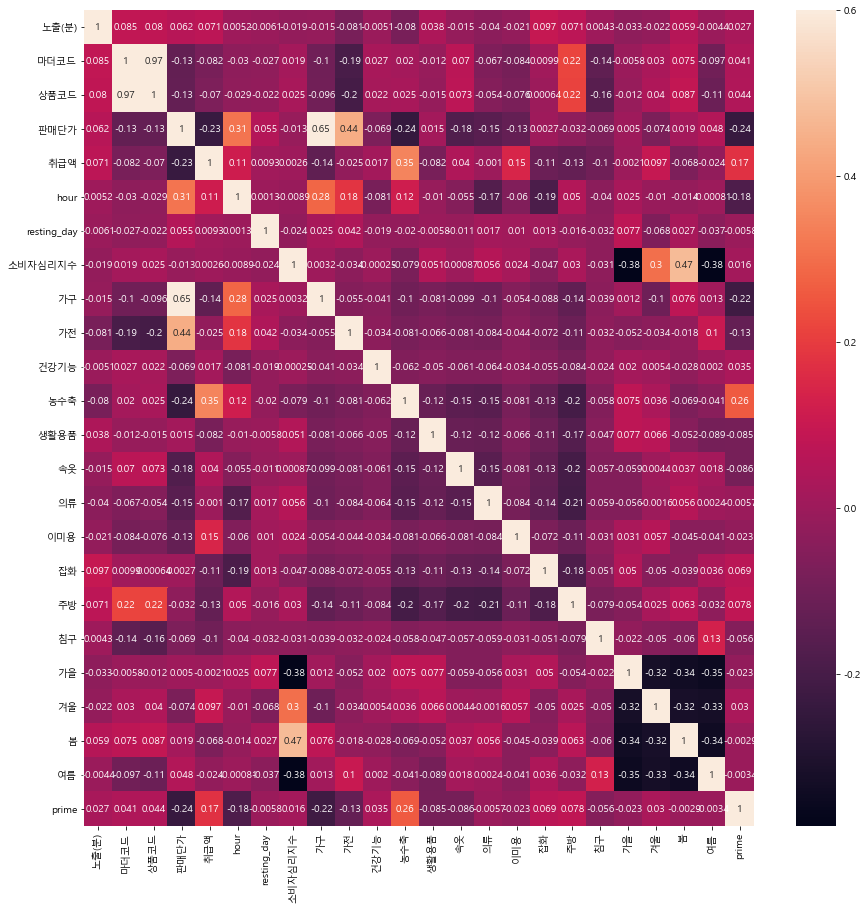

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmax=0.6, annot=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [18]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

In [37]:
kfold

KFold(n_splits=5, random_state=42, shuffle=True)

In [19]:
x=df.drop('취급액', axis=1)
y=np.ravel(df['취급액'])

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

In [29]:
rfr=RandomForestRegressor(n_estimators=250,max_depth=12,min_samples_split=8, random_state=42)

In [30]:
rfr.fit(xTrain, yTrain)

RandomForestRegressor(max_depth=12, min_samples_split=8, n_estimators=250,
                      random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
myparam = { 
    'n_estimators': range(10,300,30),
    'min_samples_split': range(2,10,2),
    'max_depth' : range(3,15,3)
}
gridCV = GridSearchCV(rfr, param_grid = myparam, cv = 5, n_jobs = 4)
gridCV.fit(xTrain,yTrain)
print(gridCV.best_params_)
gridCV.best_score_

{'max_depth': 12, 'min_samples_split': 8, 'n_estimators': 250}


0.5029483223264437

In [ ]:
# 'n_estimators':[11,51,101,151,201], 101
# 'min_samples_split':[2,4,6,8,10], 10
# 'max_depth':[3,5,7,9,11,13], 13

In [31]:
yPred=rfr.predict(xTest)

In [32]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    print(res)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [33]:
rfr.score(xTrain,yTrain)

0.602867916316391

In [34]:
mean_absolute_percentage_error(yTest,yPred)

[ 0.49952759 -1.43478951 -1.11029801 ... -0.31262117 -2.71318672
  0.13401991]


98.98759321590789

In [35]:
score=cross_val_score(rfr, xTrain, yTrain,cv=kfold)

In [36]:
print('score:', score.mean())

score: 0.5036476607294348
